# 選択ソート

In [13]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random
from my_modules import least_square

In [2]:
# 処理時間計測の準備：time.time() で現在時刻を取得するだけの処理にかかる時間は？
def measure_time_of_time(n):
    start = time.time()
    for i in range(n):
        time.time()
    end = time.time()
    millis = round((end-start)*1000000)
    return [n, millis, millis/n]

n_list = np.array([10000, 100000, 1000000, 10000000])
pd.DataFrame(data=[measure_time_of_time(n) for n in n_list], columns=['n', 'micros_total', 'micros_average'])

,n,micros_total,micros_average
0,10000,2298,0.229800
1,100000,24520,0.245200
2,1000000,246508,0.246508
3,10000000,2174856,0.217486


In [3]:
def selection_sort(array):
    N = len(array)
    for i in range(N):
        j_minimum = i
        minimum = array[j_minimum]
        for j in range(i, N):
            if array[j] < minimum:
                j_minimum = j
                minimum = array[j]
        buff = array[i]
        array[i] = minimum
        array[j_minimum] = buff

In [17]:
arr = np.array([random.randint(0, 100) for i in range(30)])
selection_sort(arr)
arr

array([ 2,  6,  6, 10, 17, 20, 27, 30, 33, 38, 44, 47, 49, 51, 51, 51, 55,
       63, 71, 73, 76, 77, 79, 81, 85, 88, 93, 96, 97, 97])

In [4]:
n_list = []
t_list = []
for n in [1000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    start = time.time()
    selection_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))

pd.DataFrame(data=np.array([n_list, t_list]).T, columns=['array length', 'sort time [s]'])

,array length,sort time [s]
0,1000.0,0.222896
1,2000.0,0.790835
2,3000.0,1.905851
3,4000.0,3.051918
4,5000.0,5.110061
5,6000.0,6.970617
6,7000.0,9.257520
7,8000.0,11.955092
8,9000.0,15.583632
9,10000.0,19.500610


,a
0,1.739842e-01
1,-5.803748e-05
2,1.968864e-07


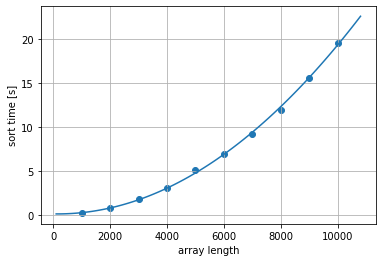

In [12]:
plt.grid()
plt.xlabel('array length')
plt.ylabel('sort time [s]')
a = least_square.least_square(np.array([n_list, t_list]).T, 2, True)
pd.DataFrame(data=a, columns=['a'])